In [1]:
!git clone https://github.com/BLShaw/CDZ-TKBA

Cloning into 'CDZ-TKBA'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 46 (delta 9), reused 43 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 1.65 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
%cd /content/CDZ-TKBA

/content/CDZ-TKBA


In [3]:
!python scripts/1_prepare_data.py

=== Step 1: Preparing Datasets ===

[MNIST] Checking/Downloading...
100% 9.91M/9.91M [00:00<00:00, 12.9MB/s]
100% 28.9k/28.9k [00:00<00:00, 338kB/s]
100% 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100% 4.54k/4.54k [00:00<00:00, 20.4MB/s]
[MNIST] Processing and saving to .npy...
  Saved mnist_train: (60000, 1, 28, 28)
  Saved mnist_test: (10000, 1, 28, 28)

[FSDD] Checking/Downloading...
  Cloning FSDD to data/fsdd...
Cloning into 'data/fsdd'...
remote: Enumerating objects: 4260, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 4260 (delta 25), reused 8 (delta 8), pack-reused 4212 (from 1)
Receiving objects: 100% (4260/4260), 30.38 MiB | 30.32 MiB/s, done.
Resolving deltas: 100% (129/129), done.
[FSDD] Found 3000 files. Generating Spectrograms...
  Saved fsdd_train: (2700, 1, 64, 64)
  Saved fsdd_test: (300, 1, 64, 64)


In [4]:
!python scripts/2_generate_encodings.py

=== Step 2: Generating Encodings ===

[Visual] Processing MNIST...
  Training Visual AE on full dataset...
Training Autoencoder on 60000 samples for 100 epochs...
Epoch [10/100], Loss: 0.0063
Epoch [20/100], Loss: 0.0046
Epoch [30/100], Loss: 0.0038
Epoch [40/100], Loss: 0.0033
Epoch [50/100], Loss: 0.0030
Epoch [60/100], Loss: 0.0028
Epoch [70/100], Loss: 0.0026
Epoch [80/100], Loss: 0.0024
Epoch [90/100], Loss: 0.0023
Epoch [100/100], Loss: 0.0022
  Generating Visual Encodings...

[Audio] Processing FSDD...
  Loading 2700 spectrograms from data/spectrograms/train...
  Loading 300 spectrograms from data/spectrograms/test...
  Training Audio AE...
Training Autoencoder on 2700 samples for 150 epochs...
Epoch [10/150], Loss: 0.0062
Epoch [20/150], Loss: 0.0044
Epoch [30/150], Loss: 0.0038
Epoch [40/150], Loss: 0.0034
Epoch [50/150], Loss: 0.0032
Epoch [60/150], Loss: 0.0030
Epoch [70/150], Loss: 0.0029
Epoch [80/150], Loss: 0.0028
Epoch [90/150], Loss: 0.0027
Epoch [100/150], Loss: 0.002

In [6]:
!python scripts/3_run_TKBA.py

=== Step 3: Running Hebbian Learning ===
Using device: cuda
Running for 110000 steps...
Step 0: V-Nodes=1, A-Nodes=1
Step 500: V-Nodes=491, A-Nodes=390
Step 1000: V-Nodes=961, A-Nodes=634
Step 1500: V-Nodes=1425, A-Nodes=820
Step 2000: V-Nodes=1877, A-Nodes=970
Step 2500: V-Nodes=2324, A-Nodes=1087
Step 3000: V-Nodes=2769, A-Nodes=1189
Step 3500: V-Nodes=3210, A-Nodes=1271
Step 4000: V-Nodes=3648, A-Nodes=1327
Step 4500: V-Nodes=4068, A-Nodes=1371
Step 5000: V-Nodes=4480, A-Nodes=1414
Step 5500: V-Nodes=4904, A-Nodes=1449
Step 6000: V-Nodes=5337, A-Nodes=1477
Step 6500: V-Nodes=5750, A-Nodes=1496
Step 7000: V-Nodes=6000, A-Nodes=1512
Step 7500: V-Nodes=6000, A-Nodes=1525
Step 8000: V-Nodes=6000, A-Nodes=1537
Step 8500: V-Nodes=6000, A-Nodes=1541
Step 9000: V-Nodes=6000, A-Nodes=1543
Step 9500: V-Nodes=6000, A-Nodes=1547
Step 10000: V-Nodes=6000, A-Nodes=1555
Step 10500: V-Nodes=6000, A-Nodes=1559
Step 11000: V-Nodes=6000, A-Nodes=1563
Step 11500: V-Nodes=6000, A-Nodes=1567
Step 12000: 

In [7]:
!python scripts/4_evaluate.py

=== Step 4: Evaluation ===
Using device: cuda

--- Supervised Evaluation (Linear Probe on Encodings) ---
Visual Modality Accuracy: 0.9229
Audio Modality Accuracy: 0.8933

--- Unsupervised Evaluation (Brain Clusters) ---
Database state restored.
Mapping visual clusters...
visual Unsupervised Accuracy: 0.9011 (Clusters: 3296)
Mapping audio clusters...
audio Unsupervised Accuracy: 0.9667 (Clusters: 223)


In [8]:
!python scripts/5_visualize.py

=== Step 5: Visualization ===
Using device: cuda
Generating t-SNE for Visual Encodings (Test) (t-SNE)...
Saved to data/plots/visual_test_tsne.png
Generating t-SNE for Visual Encodings (Train) (t-SNE)...
Saved to data/plots/visual_train_tsne.png
Generating t-SNE for Audio Encodings (Test) (t-SNE)...
Saved to data/plots/audio_test_tsne.png
Generating t-SNE for Audio Encodings (Train) (t-SNE)...
Saved to data/plots/audio_train_tsne.png


Displaying: /content/CDZ-TKBA/data/plots/visual_train_tsne.png


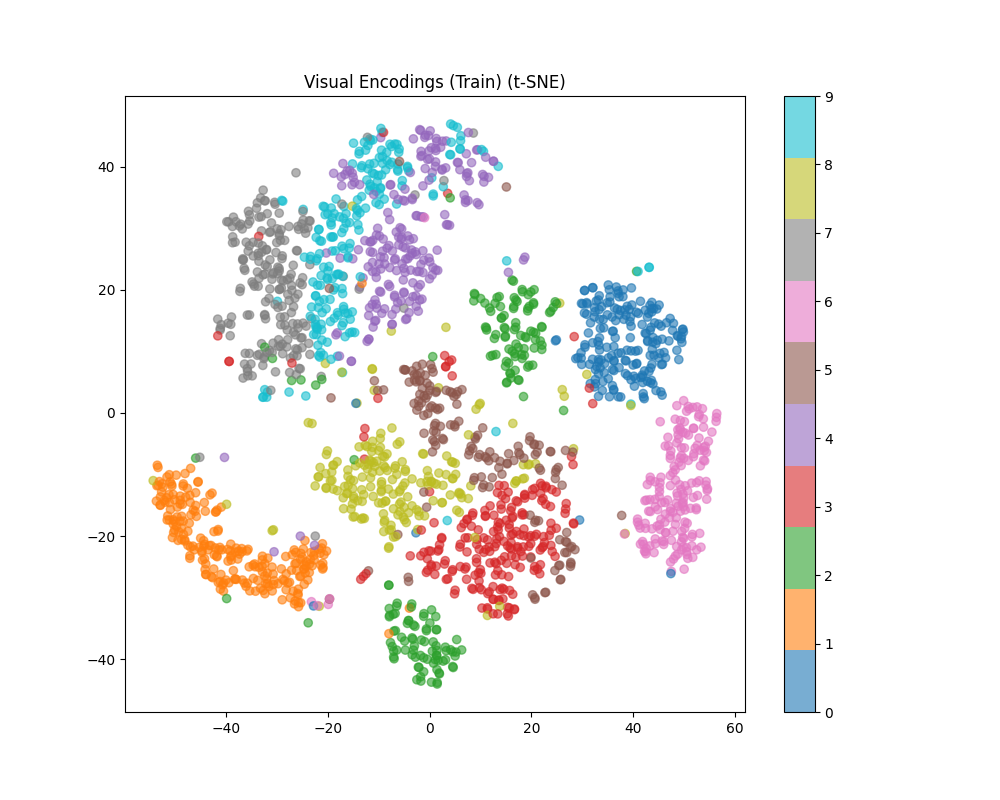

Displaying: /content/CDZ-TKBA/data/plots/visual_test_tsne.png


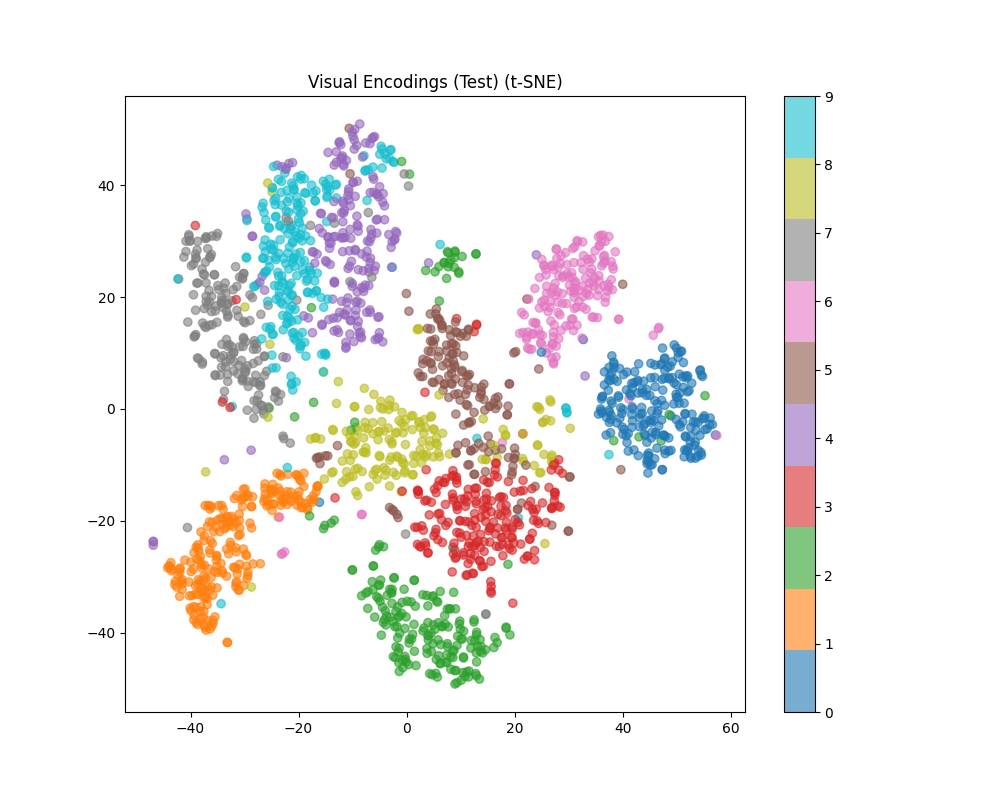

Displaying: /content/CDZ-TKBA/data/plots/audio_train_tsne.png


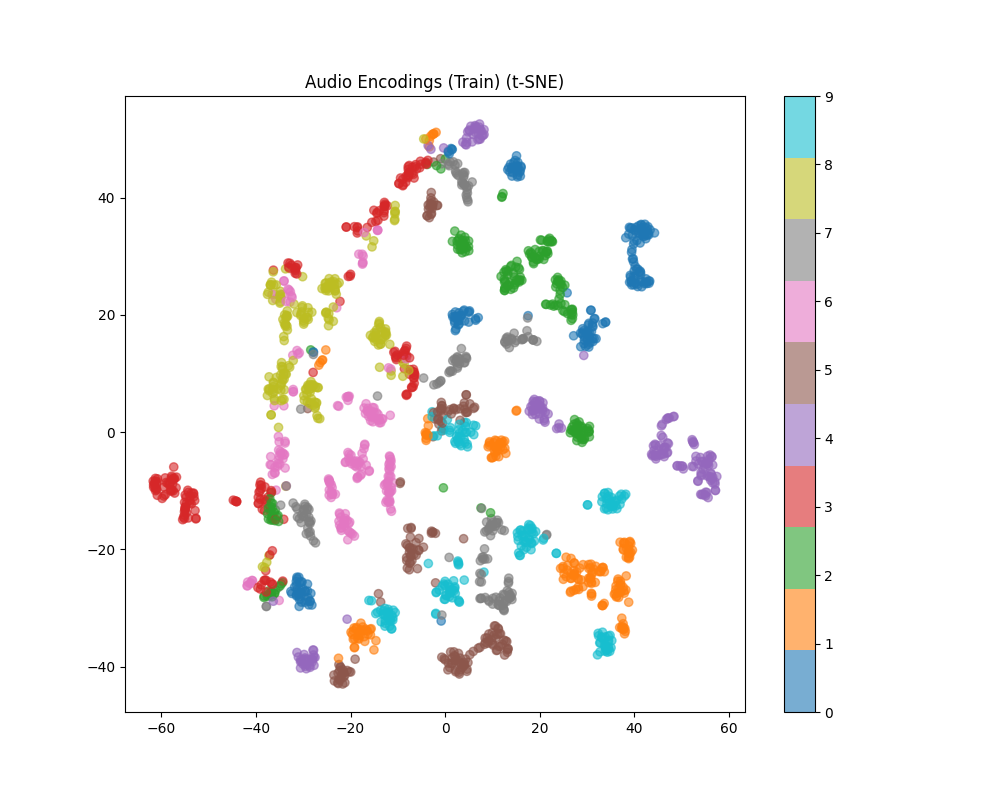

Displaying: /content/CDZ-TKBA/data/plots/audio_test_tsne.png


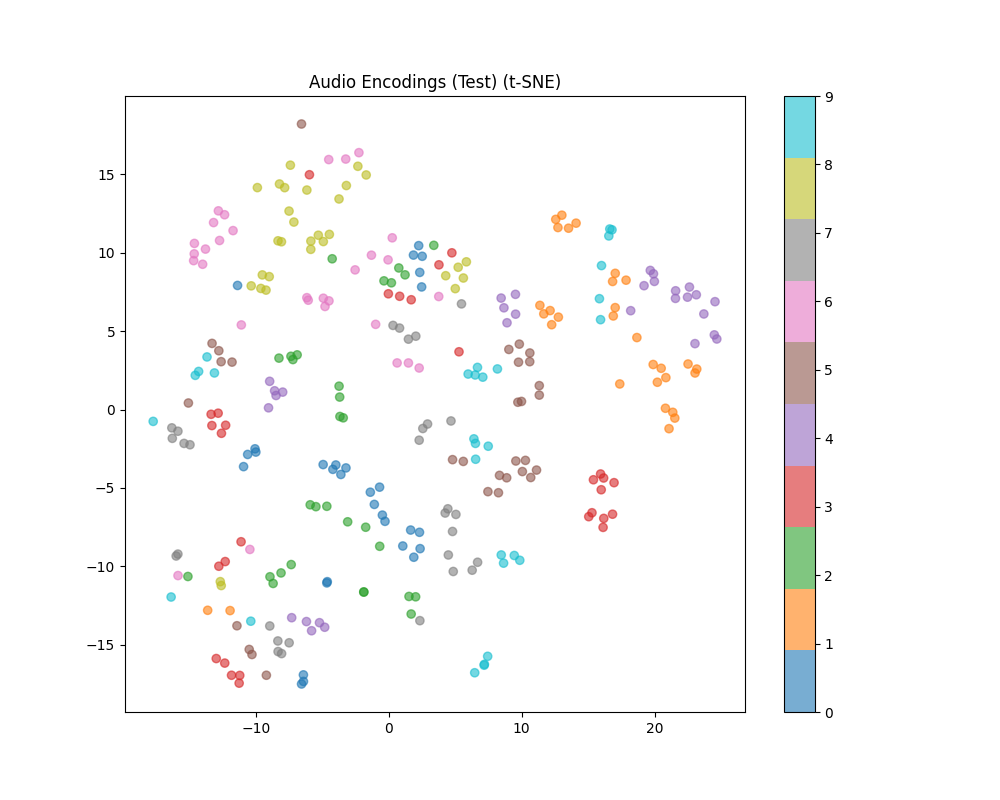

In [11]:
from IPython.display import Image, display

image_paths = [
    "/content/CDZ-TKBA/data/plots/visual_train_tsne.png",
    "/content/CDZ-TKBA/data/plots/visual_test_tsne.png",
    "/content/CDZ-TKBA/data/plots/audio_train_tsne.png",
    "/content/CDZ-TKBA/data/plots/audio_test_tsne.png"
]

for path in image_paths:
    print(f"Displaying: {path}")
    display(Image(filename=path))